Phase Shifter Matrix


Matrix([
[1.0,               0.0],
[0.0, 0.7071 + 0.7071*I]])

Initial State:


Matrix([
[0.0],
[1.0]])

Shifted State:


Matrix([
[              0.0],
[0.7071 + 0.7071*I]])

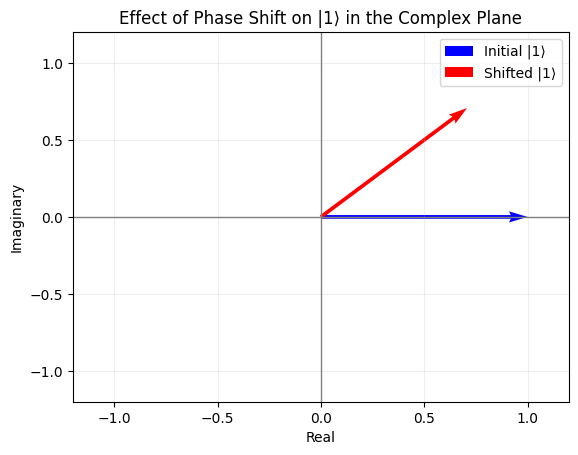

In [2]:
#-------------------------------------------------------------------------
# Quantum Phase Shift
# Chapter 5 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
#-------------------------------------------------------------------------
# Version 1.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# License:  MIT - Citation of this work required
#-------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
#-------------------------------------------------------------------------
def sprint(Matrix, decimals=4):
    """ Prints a Matrix with real and imaginary parts rounded to 'decimals' """
    import sympy as sp
    SMatrix = sp.Matrix(Matrix)  # Convert to Sympy Matrix if it's not already

    def round_complex(x):
        """Round real and imaginary parts of x to the given number of decimals."""
        c = complex(x)  # handle any real or complex Sympy expression
        r = round(c.real, decimals)
        i = round(c.imag, decimals)
        # If imaginary part is negligible, treat as purely real
        if abs(i) < 10**(-decimals): return sp.Float(r)
        else: return sp.Float(r) + sp.Float(i)*sp.I

    # Display the rounded Sympy Matrix
    display(SMatrix.applyfunc(round_complex))
    return

#-------------------------------------------------------------------------
def phase_shifter(phi):
    return np.array([
        [1, 0],
        [0, np.exp(1j * phi)]
    ])
#-------------------------------------------------------------------------

# Define the phase shift angle
phi = np.pi / 4.

# Apply phase shift to a sample quantum state (|1⟩)
initial_state = np.array([0, 1])  # |1⟩ state
shifted_state = phase_shifter(phi) @ initial_state

#-------------------------------------------------------------------------
# Print input and output
print("Phase Shifter Matrix"); sprint(phase_shifter(phi))
print("Initial State:");       sprint(initial_state)
print("Shifted State:");       sprint(shifted_state)
#-------------------------------------------------------------------------
# Plot the effect of the phase shift in the complex plane
fig, ax = plt.subplots()
ax.axhline(0, color='gray', lw=1)
ax.axvline(0, color='gray', lw=1)

# Plot initial and shifted states
ax.quiver(0, 0, initial_state[1].real, initial_state[1].imag, 
          angles='xy', scale_units='xy', scale=1, color='blue', label='Initial |1⟩')
ax.quiver(0, 0, shifted_state[1].real, shifted_state[1].imag, 
          angles='xy', scale_units='xy', scale=1, color='red', label='Shifted |1⟩')

# Formatting the plot
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel("Real")
ax.set_ylabel("Imaginary")
ax.set_title("Effect of Phase Shift on |1⟩ in the Complex Plane")
ax.legend()
ax.grid(alpha=0.2)
plt.show()
